In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drug-classification/drug200.csv


## 1.Drug Classification
- By this notebook we will useing KNeighborsClassifier and DecisionTreeClassifier to building a simple ML

![](https://wisdomml.in/wp-content/uploads/2023/03/drug-768x539.png)

## 2.About Notebook
 - As a beginner in machine learning, predicting the right drug treatment for patients offers a valuable opportunity to apply and refine various modeling techniques. This  dataset provides an excellent starting point for exploring algorithms that can accurately determine the most suitable drug for a patient based on their medical and personal attributes. By analyzing this data, we aim to assist healthcare professionals in making more informed, data-driven decisions, ultimately improving patient outcomes.

## 3.Importing the libraries
- that librarys we need it in our notebook

In [2]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

## 4.Export Our Data From CSV

In [3]:
df = pd.read_csv('/kaggle/input/drug-classification/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


- If we noticed after we are exporting data we find 4 columns need to changing to numeric values: 
- The columns are ['sex','BP','Cholesterol','Drug']

## 5.Value count to each column

In [4]:
df['Sex'].value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

- The column 'sex' has:
- 104 Males
- 96 Females
- With the total coantty are 200 items

In [5]:
df['BP'].value_counts()

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

- The column 'BP' has :
- 77 High
- 64 Low
- 59 Normal
- With the total coantty are 200 items

In [6]:
df['Cholesterol'].value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

- The column 'Cholestrol' has :
- 103 High
- 97 Normal
- with the total coantty are 200 items

In [7]:
df['Drug'].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

- The column 'Drug' has :
- 23 drugA
- 16 drugB
- 16 drugC
- 54 drugX
- 91 DrugY
- With the total coantty are 200 items

## 6.Convert columns to the numeric values

In [8]:
df = pd.get_dummies(df,columns = ['Sex'],drop_first=True)

In [9]:
df = pd.get_dummies(df,columns=['BP'],drop_first=True)

In [10]:
df = pd.get_dummies(df,columns=['Cholesterol'],drop_first=True)


In [11]:
label_mapping = {
    'drugA': 0,
    'drugB': 1,
    'drugC': 2,
    'drugX': 3,
    'DrugY': 4,
}
# Map the labels to their respective categories
df['label_Drug'] = df['Drug'].map(label_mapping)

## 7.Select values ti X and Y

In [12]:
x = df[['Age','Na_to_K','Sex_M','BP_LOW','BP_NORMAL','Cholesterol_NORMAL']]
y = df['label_Drug']


## 8.Silpte values to values testing and training

In [13]:
X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=.20)

## 9.Bilduing the model 'KNeighborsClassifier'

In [14]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train , y_train)

KNeighborsClassifier()

## 10.Predict the model 

In [15]:
y_pred = model.predict(X_test)
y_pred

array([1, 3, 2, 4, 4, 1, 0, 4, 0, 4, 0, 3, 1, 2, 1, 4, 4, 3, 3, 1, 4, 4,
       4, 4, 4, 3, 3, 4, 4, 0, 0, 4, 4, 3, 4, 3, 4, 4, 3, 4])

## 11.Check accuracy model

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.6

## 12.Find the best value of K(the number of neighbors)

In [17]:
# Define the range of k values to test
k_values = range(3,10,2)
test_accuracies = []

# Train the k-NN classifier with different values of k and evaluate on the test set
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  # Train the model
    y_pred = knn.predict(X_test)  # Predict on the test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    test_accuracies.append(accuracy)

# Determine the best k
best_k = k_values[np.argmax(test_accuracies)]
print(f"The best k value is: {best_k}")

The best k value is: 3


## 13.Viualize K

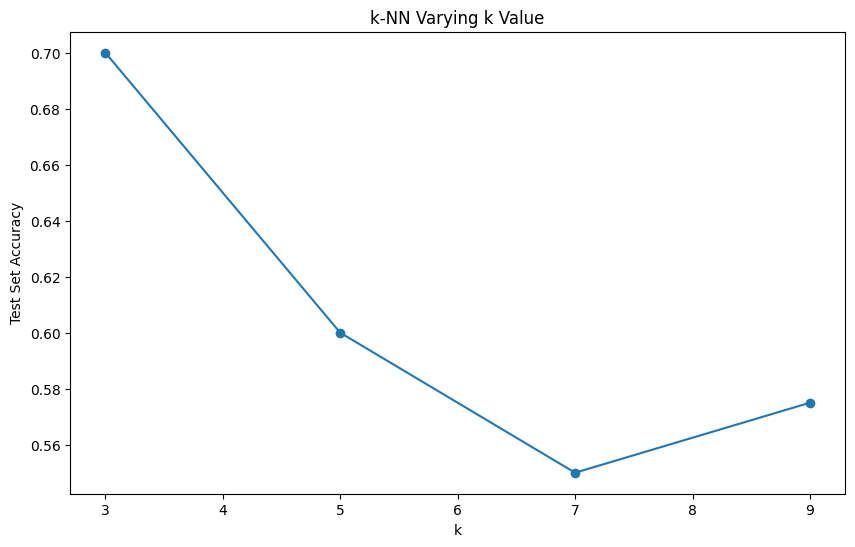

In [18]:
# Plot the k values vs. accuracy on the test set
plt.figure(figsize=(10, 6))
plt.plot(k_values, test_accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Test Set Accuracy')
plt.title('k-NN Varying k Value')
plt.show()

## 14.Bilduing the model 'DecisionTreeClassifier'

In [19]:
# model DecisionTree
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

## 15.Predict the model

In [20]:
# predict and accuracy
y_pred = model.predict(X_test)
y_pred

array([3, 0, 0, 4, 4, 2, 0, 4, 3, 4, 0, 3, 3, 1, 2, 4, 4, 1, 1, 3, 4, 4,
       4, 4, 4, 0, 2, 4, 4, 3, 3, 4, 4, 1, 4, 3, 4, 4, 3, 4])

## 16.Check accuracy model

In [21]:
accuracy_score(y_test,y_pred)

1.0

## 17.Visualize the model

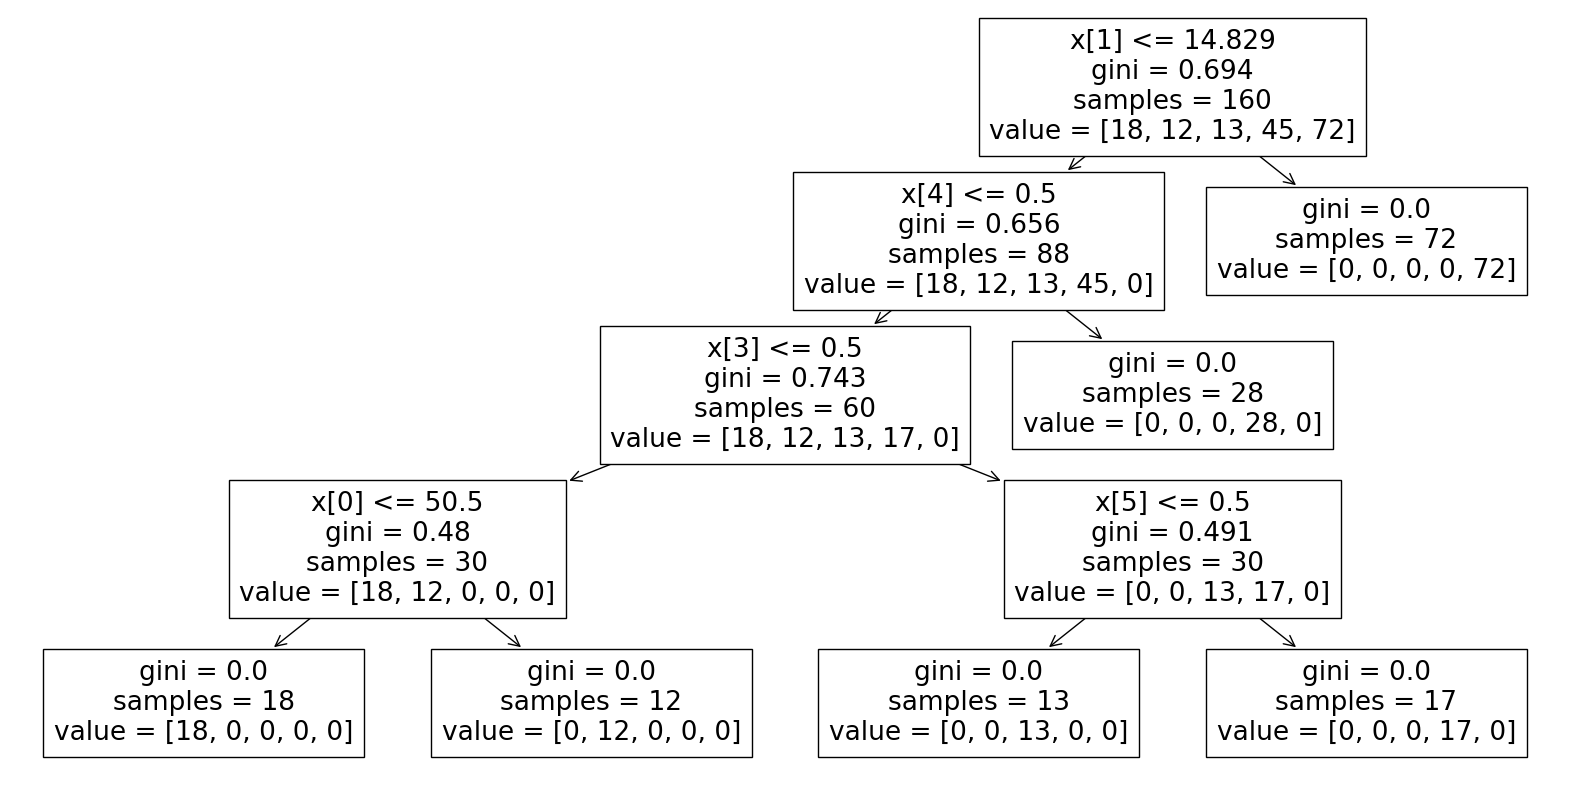

In [22]:
plt.figure(figsize=(20, 10))
tree.plot_tree(model)
plt.show()